<br>

###  <font color="Coral">hw8pr1digits_dreamer</font>   

For this hw8pr1digits_dreamer challenge, you'll leverage how NNets are the most capable model for imputing - or "hallucinating" - or _generating_ missing data 

Here, we'll put them to the test, to <font color="DodgerBlue"><b>dream</b></font> the unseen portion of a digit, only part of which is visible:



In [104]:
#
# Here, we have a one-pixel predictor, to get you started...


In [105]:
# libraries!
import numpy as np      # numpy is Python's "array" library
import pandas as pd     # Pandas is Python's "data" library ("dataframe" == spreadsheet)
import seaborn as sns
import matplotlib.pyplot as plt

In [106]:
# let's read in our digits data...
# 
# for read_csv, use header=0 when row 0 is a header row
# 
filename = 'digits.csv'
df = pd.read_csv(filename, header=0)   # encoding="utf-8" et al.
print(f"{filename} : file read into a pandas dataframe.")
df

digits.csv : file read into a pandas dataframe.


,pix0,pix1,pix2,pix3,pix4,pix5,pix6,pix7,pix8,pix9,...,pix56,pix57,pix58,pix59,pix60,pix61,pix62,pix63,actual_digit,excerpted from http://yann.lecun.com/exdb/mnist/
0,0,0,9,14,8,1,0,0,0,0,...,0,0,11,16,15,11,1,0,8,NaN
1,0,0,11,12,0,0,0,0,0,2,...,0,0,9,12,13,3,0,0,9,NaN
2,0,0,1,9,15,11,0,0,0,0,...,0,0,1,10,13,3,0,0,0,NaN
3,0,0,0,0,14,13,1,0,0,0,...,0,0,0,1,13,16,1,0,1,NaN
4,0,0,5,12,1,0,0,0,0,0,...,0,0,3,11,8,13,12,4,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1763,0,0,4,10,13,6,0,0,0,1,...,0,0,2,14,15,9,0,0,9,NaN
1764,0,0,6,16,13,11,1,0,0,0,...,0,0,6,16,14,6,0,0,0,NaN
1765,0,0,1,11,15,1,0,0,0,0,...,0,0,2,9,13,6,0,0,8,NaN
1766,0,0,2,10,7,0,0,0,0,0,...,0,0,5,12,16,12,0,0,9,NaN


In [129]:
#
# let's drop that last column (dropping is usually by _name_):
#
#   if you want a list of the column names use df.columns
coltodrop = df.columns[65]     # get last column name (with the url)
df_clean = df.drop(columns=[coltodrop])  # drop by name is typical
df_clean.info()                         # should be happier!
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1768 entries, 0 to 1767
Data columns (total 65 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   pix0          1768 non-null   int64
 1   pix1          1768 non-null   int64
 2   pix2          1768 non-null   int64
 3   pix3          1768 non-null   int64
 4   pix4          1768 non-null   int64
 5   pix5          1768 non-null   int64
 6   pix6          1768 non-null   int64
 7   pix7          1768 non-null   int64
 8   pix8          1768 non-null   int64
 9   pix9          1768 non-null   int64
 10  pix10         1768 non-null   int64
 11  pix11         1768 non-null   int64
 12  pix12         1768 non-null   int64
 13  pix13         1768 non-null   int64
 14  pix14         1768 non-null   int64
 15  pix15         1768 non-null   int64
 16  pix16         1768 non-null   int64
 17  pix17         1768 non-null   int64
 18  pix18         1768 non-null   int64
 19  pix19         1768 non-null

,pix0,pix1,pix2,pix3,pix4,pix5,pix6,pix7,pix8,pix9,...,pix56,pix57,pix58,pix59,pix60,pix61,pix62,pix63,actual_digit,excerpted from http://yann.lecun.com/exdb/mnist/
0,0,0,9,14,8,1,0,0,0,0,...,0,0,11,16,15,11,1,0,8,NaN
1,0,0,11,12,0,0,0,0,0,2,...,0,0,9,12,13,3,0,0,9,NaN
2,0,0,1,9,15,11,0,0,0,0,...,0,0,1,10,13,3,0,0,0,NaN
3,0,0,0,0,14,13,1,0,0,0,...,0,0,0,1,13,16,1,0,1,NaN
4,0,0,5,12,1,0,0,0,0,0,...,0,0,3,11,8,13,12,4,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1763,0,0,4,10,13,6,0,0,0,1,...,0,0,2,14,15,9,0,0,9,NaN
1764,0,0,6,16,13,11,1,0,0,0,...,0,0,6,16,14,6,0,0,0,NaN
1765,0,0,1,11,15,1,0,0,0,0,...,0,0,2,9,13,6,0,0,8,NaN
1766,0,0,2,10,7,0,0,0,0,0,...,0,0,5,12,16,12,0,0,9,NaN


In [130]:
#
# let's keep our column names in variables, for reference
#
COLUMNS = df_clean.columns            # "list" of columns
print(f"COLUMNS: {COLUMNS}")  

# let's create a dictionary to look up any column index by name
COL_INDEX = {}
for i, name in enumerate(COLUMNS):
    COL_INDEX[name] = i  # using the name (as key), look up the value (i)
print(f"COL_INDEX: {COL_INDEX}")

# and for our "SPECIES"!
SPECIES = [ str(i) for i in range(0,10) ]  # list with a string at each index (index -> string)
SPECIES_INDEX = { s:int(s) for s in SPECIES }  # dictionary mapping from string -> index

# and our "target labels"
print(f"SPECIES: {SPECIES}")  
print(f"SPECIES_INDEX: {SPECIES_INDEX}")

COLUMNS: Index(['pix0', 'pix1', 'pix2', 'pix3', 'pix4', 'pix5', 'pix6', 'pix7', 'pix8',
       'pix9', 'pix10', 'pix11', 'pix12', 'pix13', 'pix14', 'pix15', 'pix16',
       'pix17', 'pix18', 'pix19', 'pix20', 'pix21', 'pix22', 'pix23', 'pix24',
       'pix25', 'pix26', 'pix27', 'pix28', 'pix29', 'pix30', 'pix31', 'pix32',
       'pix33', 'pix34', 'pix35', 'pix36', 'pix37', 'pix38', 'pix39', 'pix40',
       'pix41', 'pix42', 'pix43', 'pix44', 'pix45', 'pix46', 'pix47', 'pix48',
       'pix49', 'pix50', 'pix51', 'pix52', 'pix53', 'pix54', 'pix55', 'pix56',
       'pix57', 'pix58', 'pix59', 'pix60', 'pix61', 'pix62', 'pix63',
       'actual_digit'],
      dtype='object')
COL_INDEX: {'pix0': 0, 'pix1': 1, 'pix2': 2, 'pix3': 3, 'pix4': 4, 'pix5': 5, 'pix6': 6, 'pix7': 7, 'pix8': 8, 'pix9': 9, 'pix10': 10, 'pix11': 11, 'pix12': 12, 'pix13': 13, 'pix14': 14, 'pix15': 15, 'pix16': 16, 'pix17': 17, 'pix18': 18, 'pix19': 19, 'pix20': 20, 'pix21': 21, 'pix22': 22, 'pix23': 23, 'pix24': 24, 'pix25

In [131]:
#
# let's convert our dataframe to a numpy array, named A
#    Our ML library, scikit-learn operates entirely on numpy arrays.
#
A = df_clean.to_numpy()    # .values gets the numpy array
A = A.astype('float64')  # so many:  www.tutorialspoint.com/numpy/numpy_data_types.htm
print(f"A's shape is {A.shape}")
print(A)

A's shape is (1768, 65)
[[ 0.  0.  9. ...  1.  0.  8.]
 [ 0.  0. 11. ...  0.  0.  9.]
 [ 0.  0.  1. ...  0.  0.  0.]
 ...
 [ 0.  0.  1. ...  0.  0.  8.]
 [ 0.  0.  2. ...  0.  0.  9.]
 [ 0.  0. 10. ...  1.  0.  8.]]


In [132]:
#
# You will explore a different direction: "hallucinating" new data!
#      This is sometimes called "imputing" missing data.
#

# First, build a regressor that
#      + uses the first 48 pixels (6 image rows) to predict the floating-point value of pix52
#      + we'll see how accurate it is...
#      + then, you'll expand this process to build a regressor for _each_ pixel indexed from 48-63
#      + and use those to "imagine" the bottom two rows of the digits...

In [133]:
#
# some starting code is provided here...
#

In [134]:
#
# regression model that uses as input the first 48 pixels (pix0 to pix47)
#                       and, as output, predicts the value of pix52
#

print("+++ Start of regression prediction of pix52! +++\n")

X_all = A[:,0:48]  ### old: np.concatenate( (A[:,0:3], A[:,4:]),axis=1)  # horizontal concatenation
y_all = A[:,52]    # y (labels) ... is all rows, column indexed 52 (pix52) only (actually the 53rd pixel, but ok)

print(f"y_all (just target values, pix52)   is \n {y_all}") 
print(f"X_all (just features: 3 rows) is \n {X_all[:3,:]}")

+++ Start of regression prediction of pix52! +++

y_all (just target values, pix52)   is 
 [ 3.  9. 10. ... 15.  7.  8.]
X_all (just features: 3 rows) is 
 [[ 0.  0.  9. 14.  8.  1.  0.  0.  0.  0. 12. 14. 14. 12.  0.  0.  0.  0.
   9. 10.  0. 15.  4.  0.  0.  0.  3. 16. 12. 14.  2.  0.  0.  0.  4. 16.
  16.  2.  0.  0.  0.  3. 16.  8. 10. 13.  2.  0.]
 [ 0.  0. 11. 12.  0.  0.  0.  0.  0.  2. 16. 16. 16. 13.  0.  0.  0.  3.
  16. 12. 10. 14.  0.  0.  0.  1. 16.  1. 12. 15.  0.  0.  0.  0. 13. 16.
   9. 15.  2.  0.  0.  0.  0.  3.  0.  9. 11.  0.]
 [ 0.  0.  1.  9. 15. 11.  0.  0.  0.  0. 11. 16.  8. 14.  6.  0.  0.  2.
  16. 10.  0.  9.  9.  0.  0.  1. 16.  4.  0.  8.  8.  0.  0.  4. 16.  4.
   0.  8.  8.  0.  0.  1. 16.  5.  1. 11.  3.  0.]]


In [135]:
#
# we scramble the data, to give a different TRAIN/TEST split each time...
# 
indices = np.random.permutation(len(y_all))  # indices is a permutation-list

# we scramble both X and y, necessarily with the same permutation
X_all = X_all[indices]              # we apply the _same_ permutation to each!
y_all = y_all[indices]              # again...
print("labels (target)\n",y_all)
print("features\n", X_all[:3,:])

labels (target)
 [10. 14.  3. ... 14.  0. 15.]
features
 [[ 0.  0.  3. 13.  9.  1.  0.  0.  0.  0. 13. 14. 15. 13.  0.  0.  0.  2.
  14.  1.  2. 13.  4.  0.  0.  4.  8.  0.  0.  5.  8.  0.  0.  4.  8.  0.
   0.  4.  8.  0.  0.  4. 10.  0.  0.  5.  8.  0.]
 [ 0.  0.  0.  2. 15.  7.  0.  0.  0.  0.  0. 11. 15.  2.  5.  0.  0.  0.
   5. 16.  6.  6. 16.  0.  0.  2. 16. 10.  4. 13. 13.  0.  0. 13. 16. 16.
  16. 16. 10.  0.  0.  6.  4.  4. 11. 16.  4.  0.]
 [ 0.  1.  9. 15. 13.  4.  0.  0.  0.  8. 12.  4.  8.  8.  0.  0.  0.  9.
  11.  0.  5. 16.  3.  0.  0.  4. 13.  8. 16. 16.  6.  0.  0.  0.  4.  8.
   2. 11.  9.  0.  0.  0.  0.  0.  0. 10.  8.  0.]]


In [136]:
#
# a common convention:  train on 80%, test on 20%    Let's define the TEST_PERCENT
#

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.2)

print(f"training with {len(y_train)} rows;  testing with {len(y_test)} rows\n" )

print(f"Held-out data... (testing data: {len(y_test)})")
print(f"y_test: {y_test}\n")
print(f"X_test (few rows): {X_test[0:5,:]}")  # 5 rows
print()
print(f"Data used for modeling... (training data: {len(y_train)})")
print(f"y_train: {y_train}\n")
print(f"X_train (few rows): {X_train[0:5,:]}")  # 5 rows

training with 1414 rows;  testing with 354 rows

Held-out data... (testing data: 354)
y_test: [12. 15.  4. 10. 16.  4. 12. 15.  4.  7. 15.  5. 12.  6. 10. 16. 16. 15.
  8.  9.  1. 16.  6.  0.  8.  5.  3. 14. 12. 16.  1. 12. 13.  0. 16.  5.
 16.  4.  0.  7.  4.  7. 15. 12.  8. 13.  7. 16.  8.  6.  3. 15. 16. 14.
 16. 13. 12.  0.  4.  5. 11. 13. 11.  2. 13.  9.  9.  1.  4. 15. 16.  9.
  5. 15. 13.  5. 15. 11. 14.  8. 14. 16.  0. 16. 15.  0. 16.  8. 16.  5.
  1. 13.  3. 13. 10.  7. 15.  5. 14. 14.  6. 14. 14.  9.  4. 15. 10.  2.
 10. 16.  8. 14. 16. 16. 15. 13.  7.  1.  4.  9.  4.  6. 15. 15. 16. 12.
 16.  6.  9.  8.  2. 16.  5.  1.  0. 16. 12.  9.  3. 10.  8. 14.  0.  8.
  6.  4. 10.  9. 12. 14. 13. 16. 16.  8.  9.  2.  6. 15. 11. 10.  4.  1.
 16.  6.  8. 14.  1. 11.  1. 16. 13. 16.  8.  9. 12. 16. 10. 10. 16. 13.
 14.  8.  1.  4. 14. 11.  9.  2.  4.  5.  7. 15.  3. 10. 15. 10. 10.  1.
  1.  4. 16. 16.  0.  7.  7. 16. 16.  2.  8.  8. 14.  7. 10.  2. 15. 15.
 15.  7. 10.  8.  9. 15. 12. 1

In [137]:
#
# for NNets, it's important to keep the feature values near 0, say -1. to 1. or so
#    This is done through the "StandardScaler" in scikit-learn
# 
from sklearn.preprocessing import StandardScaler
USE_SCALER = True   # this variable is important! It tracks if we need to use the scaler...

# we "train the scaler"  (computes the mean and standard deviation)
if USE_SCALER == True:
    scaler = StandardScaler()
    scaler.fit(X_train)  # Scale with the training data! ave becomes 0; stdev becomes 1
else:
    # this one does no scaling!  We still create it to be consistent:
    scaler = StandardScaler(copy=True, with_mean=False, with_std=False) # no scaling
    scaler.fit(X_train)  # still need to fit, though it does not change...

scaler   # is now defined and ready to use...

# ++++++++++++++++++++++++++++++++++++++++++++++++++++++

# Here is a fully-scaled dataset:

X_all_scaled = scaler.transform(X_all)
y_all_scaled = y_all.copy()      # not scaled


# Here are our scaled training and testing sets:

X_train_scaled = scaler.transform(X_train) # scale!
X_test_scaled = scaler.transform(X_test) # scale!

y_train_scaled = y_train  # the predicted/desired labels are not scaled
y_test_scaled = y_test  # not using the scaler

def ascii_table(X,y):
    """ print a table of binary inputs and outputs """
    print(f"{'input ':>70s} -> {'pred':<5s} {'des.':<5s}") 
    for i in range(len(y)):
        s_to_show = str(X[i,:])
        s_to_show = s_to_show[0:60]
        print(f"{s_to_show!s:>70s} -> {'?':<5s} {y[i]:<5.0f}")   # !s is str ...
    
ascii_table(X_train_scaled[0:5,:],y_train_scaled[0:5])

#
# Note that the zeros have become -1's
# and the 1's have stayed 1's
#

                                                                input  -> pred  des. 
          [ 0.         -0.34427818  1.18720858  0.96439692  0.02864596 -> ?     4    
          [ 0.         -0.34427818 -1.12304318 -1.8969227   0.73105164 -> ?     4    
          [ 0.         -0.34427818 -0.91302029  0.01062371 -0.43962448 -> ?     16   
          [ 0.         -0.34427818 -1.12304318  0.24906701 -0.67375971 -> ?     5    
          [ 0.         -0.34427818 -0.7029974   0.48751031  0.26278119 -> ?     5    


In [138]:
#
# MLPRegressor predicts _floating-point_ outputs
#

from sklearn.neural_network import MLPRegressor

nn_regressor = MLPRegressor(hidden_layer_sizes=(6,7), 
                    max_iter=342,          # how many training epochs
                    activation="tanh",     # the activation function
                    solver='sgd',          # the optimizer
                    verbose=False,          # do we want to watch as it trains?
                    shuffle=True,          # shuffle each epoch?
                    random_state=None,     # use for reproducibility
                    learning_rate_init=.1, # how much of each error to back-propagate
                    learning_rate = 'adaptive')  # how to handle the learning_rate

print("\n\n++++++++++  TRAINING:  begin  +++++++++++++++\n\n")
nn_regressor.fit(X_train_scaled, y_train_scaled)
print("++++++++++  TRAINING:   end  +++++++++++++++")

print(f"The (squared) prediction error (the loss) is {nn_regressor.loss_}")
print(f"And, its square root: {nn_regressor.loss_ ** 0.5}")



++++++++++  TRAINING:  begin  +++++++++++++++


++++++++++  TRAINING:   end  +++++++++++++++
The (squared) prediction error (the loss) is 6.2347831235467535
And, its square root: 2.49695477002423


/opt/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (342) reached and the optimization hasn't converged yet.
  warnings.warn(


In [139]:
#
# how did it do? now we're making progress (by regressing)
#

def ascii_table_for_regressor(Xsc,y,nn,scaler):
    """ a table including predictions using nn.predict """
    predictions = nn.predict(Xsc) # all predictions
    Xpr = scaler.inverse_transform(Xsc)  # Xpr is the "X to print": unscaled data!
    # measure error
    error = 0.0
    # printing
    #print(f"{'input ':>35s} ->  {'pred':^6s}  {'des.':^6s}  {'absdiff':^10s}") 
    for i in range(len(y)):
        pred = predictions[i]
        desired = y[i]
        result = abs(desired - pred)
        error += result
        # Xpr = Xsc   # if you'd like to see the scaled values
        s_to_show = str(Xpr[i,:])
        s_to_show = s_to_show[0:25]  # we'll just take 25 of these
        #print(f"{s_to_show!s:>35s} ->  {pred:<+6.3f}  {desired:<+6.3f}  {result:^10.3f}") 

    # print("\n" + "+++++   +++++      +++++   +++++   ")
    # print(f"average abs error: {error/len(y)}")
    # print("+++++   +++++      +++++   +++++   ")
    
#
# let's see how it did on the test data 
# 
if True:
    ascii_table_for_regressor(X_test_scaled,
                            y_test_scaled,
                            nn_regressor,
                            scaler)   # this is our own f'n, above

# and how it did on the training data!
#
if False:
    ascii_table_for_regressor(X_train_scaled,
                            y_train_scaled,
                            nn_regressor,
                            scaler)   # this is our own f'n, above


In [140]:
#
# let's create a final nn_regressor for pix52
#
pix52_final_regressor = MLPRegressor(hidden_layer_sizes=(6,7), 
                                    max_iter=1000, 
                                    activation="tanh",
                                    solver='sgd', 
                                    verbose=False, 
                                    shuffle=True,
                                    random_state=None, # reproduceability!
                                    learning_rate_init=.1, 
                                    learning_rate = 'adaptive')

print("\n\n++++++++++  TRAINING:  begin  +++++++++++++++\n\n")
pix52_final_regressor.fit(X_all_scaled, y_all_scaled)
print("\n\n++++++++++  TRAINING:   end  +++++++++++++++\n\n")

print(f"The (sq) prediction error (the loss) is {pix52_final_regressor.loss_}") 
print(f"So, the 'average' error per pixel is {pix52_final_regressor.loss_**0.5}")



++++++++++  TRAINING:  begin  +++++++++++++++




++++++++++  TRAINING:   end  +++++++++++++++


The (sq) prediction error (the loss) is 3.351764408321901
So, the 'average' error per pixel is 1.8307824579457552


In [ ]:
#
# and, let's be sure we can use our "finalized" model:
#

def predict_from_model(pixels, model, scaler):
    """ returns the prediction on the input pixels using the input model
    """
    pixels_array = np.asarray([pixels])   # the extra sq. brackets are needed!
    pixels_scaled = scaler.transform(pixels_array)  # need to use the scaler!
    predicted = model.predict(pixels_scaled)
    return predicted

#
# let's choose a digit to try...
#
row_to_show = 4                         # different indexing from X_all and y_all (they were reordered)
numeral = A[row_to_show,64]
print(f"The numeral is a {int(numeral)}\n")

all_pixels = A[row_to_show,0:64] 
first48pixels = A[row_to_show,0:48] 

pix52_predicted = predict_from_model(first48pixels,pix52_final_regressor)
pix52_actual = A[row_to_show,52]

print(f"pix52 [predicted] vs. actual:  {pix52_predicted} vs. {pix52_actual}")

The numeral is a 2

pix52 [predicted] vs. actual:  [14.55319057] vs. 15.0


In [142]:
#
# Let's visualize!   Here's the idea: 
# 
# Choose a row index (row_to_show)
# Show the original digit
# Show the original digit with pix52 replaced (may not be noticeable...)
# show the original digit with the bottom-two rows zero'ed out _except_ pix 52 :-)
#

In [143]:
#
# Let's create a function to show one digit
#

def show_digit( pixels ):
    """ should create a heatmap (image) of the digit contained in row 
            input: pixels should be a 1d numpy array
            if it's more then 64 values, it will be truncated
            if it's fewer than 64 values, 0's will be appended
            
    """
    # make sure the sizes are ok!
    num_pixels = len(pixels)
    if num_pixels != 64:
        print(f"(in show_digit) num_pixels was {num_pixels}; now set to 64")
    if num_pixels > 64:   # an elif would be a poor choice here, as I found!
        pixels = pixels[0:64]
    if num_pixels < 64:   
        num_zeros = 64-len(pixels)
        pixels = np.concatenate( (pixels, np.zeros(num_zeros)), axis=0 )
        
    pixels = pixels.astype(int)         # convert to integers for plotting
    pixels = np.reshape(pixels, (8,8))  # make 8x8
    # print(f"The pixels are\n{pixels}")  
    f, ax = plt.subplots(figsize=(9, 6))  # Draw a heatmap w/option of numeric values in each cell
    
    #my_cmap = sns.dark_palette("Purple", as_cmap=True)
    my_cmap = sns.light_palette("Gray", as_cmap=True)    # all seaborn palettes: medium.com/@morganjonesartist/color-guide-to-seaborn-palettes-da849406d44f
    # plot! annot=True to see the values...   palettes listed at very bottom of this notebook
    sns.heatmap(pixels, annot=False, fmt="d", linewidths=.5, ax=ax, cmap=my_cmap) # 'seismic'

The numeral is a 6

pix52 [predicted] vs. actual:  [6.3292806] 12.0


/var/folders/5x/nzkl3mms5v944gv4c0bxnc0r0000gn/T/ipykernel_67800/3729244964.py:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  all_pixels[52] = np.round(pix52_predicted)    # include this one


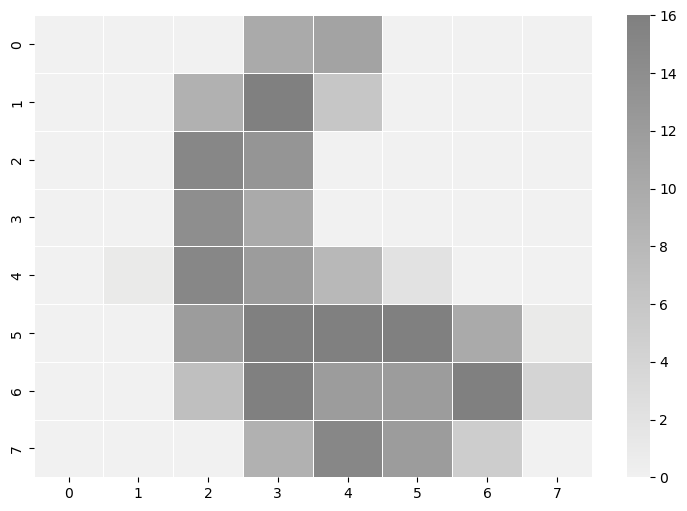

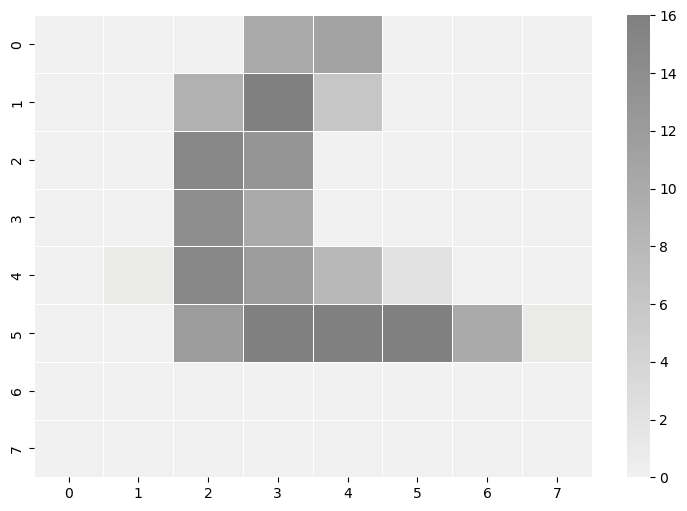

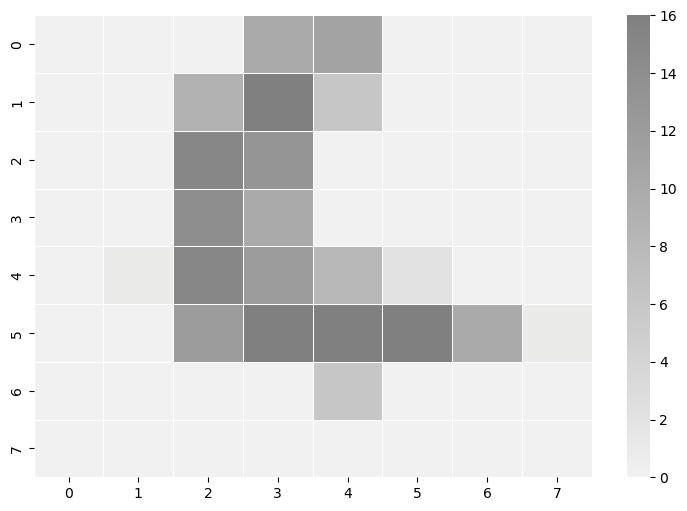

In [144]:
#
# Another example of predicting one pixel
#
row_to_show = 42                         
numeral = A[row_to_show,64]
print(f"The numeral is a {int(numeral)}\n")
# show all from the original data
show_digit( A[row_to_show,0:64] )   # show full original

all_pixels = A[row_to_show,0:64].copy()
first48pixels = all_pixels[0:48] 

pix52_predicted = predict_from_model(first48pixels,pix52_final_regressor)
pix52_actual = A[row_to_show,52]

print(f"pix52 [predicted] vs. actual:  {pix52_predicted} {pix52_actual}")

# erase last 16 pixels
all_pixels[48:64] = np.zeros(16)

# show without pix52
all_pixels[52] = 0         # omit this one
show_digit( all_pixels )   # show without pixel 52

# show with pix52
all_pixels[52] = np.round(pix52_predicted)    # include this one
show_digit( all_pixels )   # show with pixel 52




<br>

## Your first task:
+ create regressors for _all_ of the pixels on the bottom two rows
+ Use a loop! 16 times is too many for copy-paste-edit!

#### Second, create a slight variation on the visualization above, so that 
+ your system "dreams" all 16 of the bottom two rows of pixels
+ You will be able to see the dreamt digit alongside the real digit
+ <font color="Coral"><b>Show three examples (real and hallucinated!)</b></font> &nbsp;&nbsp; Choose three digits from the dataset and show the original vs. the digit-dreamt version alongside each other / side-by-side in this way. 


In [145]:
#
# Adapt from the previous example:
#

In [203]:


#
# regression model that uses as input the first 48 pixels (pix0 to pix47)
#                       and, as output, predicts the value of pix52
#

def preprocess_data(A, lastPixKnown, pixPredict):

    #print("+++ Start of regression prediction of pix52! +++\n")
    X_all = A[:,0:lastPixKnown]
    y_all = A[:,pixPredict]

    # we scramble the data, to give a different TRAIN/TEST split each time...
    # 
    indices = np.random.permutation(len(y_all))  # indices is a permutation-list

    # we scramble both X and y, necessarily with the same permutation
    X_all = X_all[indices]              # we apply the _same_ permutation to each!
    y_all = y_all[indices]              # again...

    #
    # a common convention:  train on 80%, test on 20%    Let's define the TEST_PERCENT
    #

    from sklearn.model_selection import train_test_split

    X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size = 0.2)

    from sklearn.preprocessing import StandardScaler
    USE_SCALER = True
    # we "train the scaler"  (computes the mean and standard deviation)
    if USE_SCALER == True:
        scaler = StandardScaler()
        scaler.fit(X_train)  # Scale with the training data! ave becomes 0; stdev becomes 1
    else:
        # this one does no scaling!  We still create it to be consistent:
        scaler = StandardScaler(copy=True, with_mean=False, with_std=False) # no scaling
        scaler.fit(X_train)  # still need to fit, though it does not change...

    scaler   # is now defined and ready to use...

    # ++++++++++++++++++++++++++++++++++++++++++++++++++++++

    # Here is a fully-scaled dataset:

    X_all_scaled = scaler.transform(X_all)
    y_all_scaled = y_all.copy()      # not scaled


    # Here are our scaled training and testing sets:

    X_train_scaled = scaler.transform(X_train) # scale!
    X_test_scaled = scaler.transform(X_test) # scale!

    y_train_scaled = y_train  # the predicted/desired labels are not scaled
    y_test_scaled = y_test  # not using the scaler

    #ascii_table(X_train_scaled[0:5,:],y_train_scaled[0:5])
    return X_all_scaled, y_all_scaled, X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled, scaler 


In [207]:
#
# MLPRegressor predicts _floating-point_ outputs
#

from sklearn.neural_network import MLPRegressor

def train_for_pixel(X_train_scaled, y_train_scaled, row_to_show, predict, lastPixKnown, scaler): 

    nn_regressor = MLPRegressor(hidden_layer_sizes=(6,7), 
                        max_iter=1000,          # how many training epochs
                        activation="tanh",     # the activation function
                        solver='sgd',          # the optimizer
                        verbose=False,          # do we want to watch as it trains?
                        shuffle=True,          # shuffle each epoch?
                        random_state=None,     # use for reproducibility
                        learning_rate_init=.1, # how much of each error to back-propagate
                        learning_rate = 'adaptive')  # how to handle the learning_rate

    #print("\n\n++++++++++  TRAINING:  begin  +++++++++++++++\n\n")
    nn_regressor.fit(X_train_scaled, y_train_scaled)
    #print("++++++++++  TRAINING:   end  +++++++++++++++")

    #print(f"The (squared) prediction error (the loss) is {nn_regressor.loss_}")
    #print(f"And, its square root: {nn_regressor.loss_ ** 0.5}")

            
    #
    # let's see how it did on the test data 
    # 
    if True:
        ascii_table_for_regressor(X_test_scaled,
                                y_test_scaled,
                                nn_regressor,
                                scaler)   # this is our own f'n, above

    # and how it did on the training data!
    #
    if False:
        ascii_table_for_regressor(X_train_scaled,
                                y_train_scaled,
                                nn_regressor,
                                scaler)   # this is our own f'n, above
        
    #
    # let's create a final nn_regressor for pix52
    #
    pix_final_regressor = MLPRegressor(hidden_layer_sizes=(6,7), 
                                        max_iter=1000, 
                                        activation="tanh",
                                        solver='sgd', 
                                        verbose=False, 
                                        shuffle=True,
                                        random_state=None, # reproduceability!
                                        learning_rate_init=.1, 
                                        learning_rate = 'adaptive')

    #print("\n\n++++++++++  TRAINING:  begin  +++++++++++++++\n\n")
    pix_final_regressor.fit(X_all_scaled, y_all_scaled)
    #print("\n\n++++++++++  TRAINING:   end  +++++++++++++++\n\n")

    #print(f"The (sq) prediction error (the loss) is {pix_final_regressor.loss_}") 
    #print(f"So, the 'average' error per pixel is {pix_final_regressor.loss_**0.5}")

    #
    # let's predict the pixel requested
    #

    all_pixels = A[row_to_show,0:64] 
    first48pixels = A[row_to_show,0:lastPixKnown] 
    

    pix_predicted = predict_from_model(first48pixels,pix_final_regressor)
    pix_actual = A[row_to_show, predict]
    return pix_predicted, pix_actual

The numeral is a 2

pix 48 [predicted] vs. actual:  [0.01745145] vs. 0.0
pix 49 [predicted] vs. actual:  [-0.31306432] vs. 0.0
pix 50 [predicted] vs. actual:  [5.59646477] vs. 9.0
pix 51 [predicted] vs. actual:  [14.80878433] vs. 16.0
pix 52 [predicted] vs. actual:  [13.45910183] vs. 15.0


/opt/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


pix 53 [predicted] vs. actual:  [4.92079634] vs. 9.0
pix 54 [predicted] vs. actual:  [7.80648193] vs. 8.0
pix 55 [predicted] vs. actual:  [1.74071024] vs. 2.0
pix 56 [predicted] vs. actual:  [-0.00669214] vs. 0.0
pix 57 [predicted] vs. actual:  [0.05335415] vs. 0.0
pix 58 [predicted] vs. actual:  [1.70756424] vs. 3.0
pix 59 [predicted] vs. actual:  [9.04593609] vs. 11.0
pix 60 [predicted] vs. actual:  [6.87066393] vs. 8.0
pix 61 [predicted] vs. actual:  [13.73359859] vs. 13.0
pix 62 [predicted] vs. actual:  [13.53969287] vs. 12.0
pix 63 [predicted] vs. actual:  [2.92597945] vs. 4.0
pix52 [predicted] vs. actual:  [14.55319057] 15.0


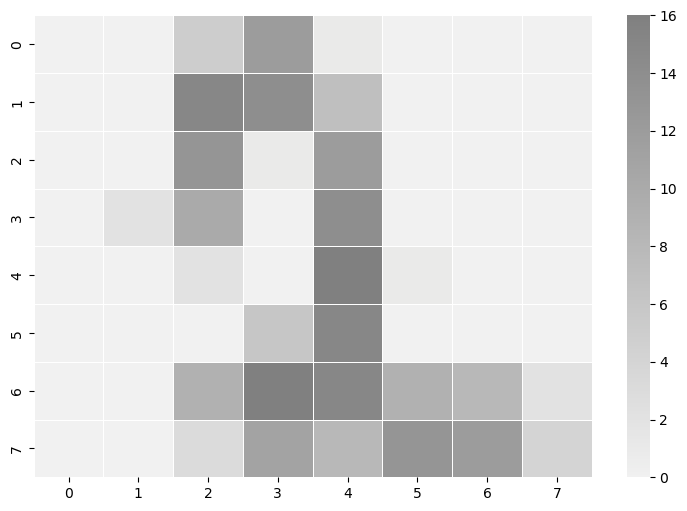

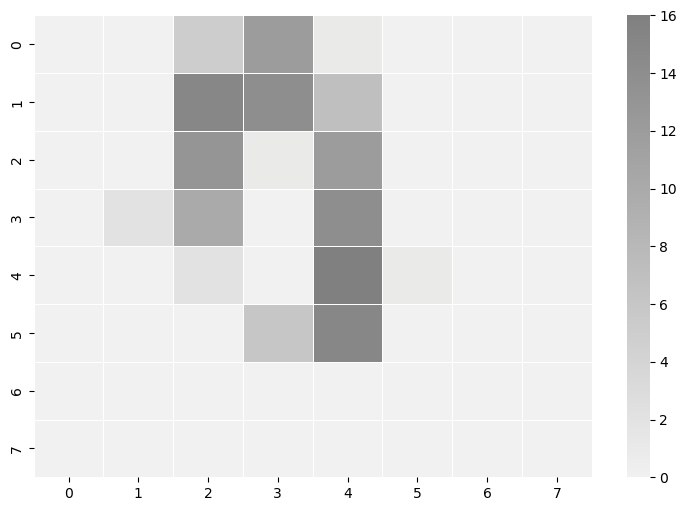

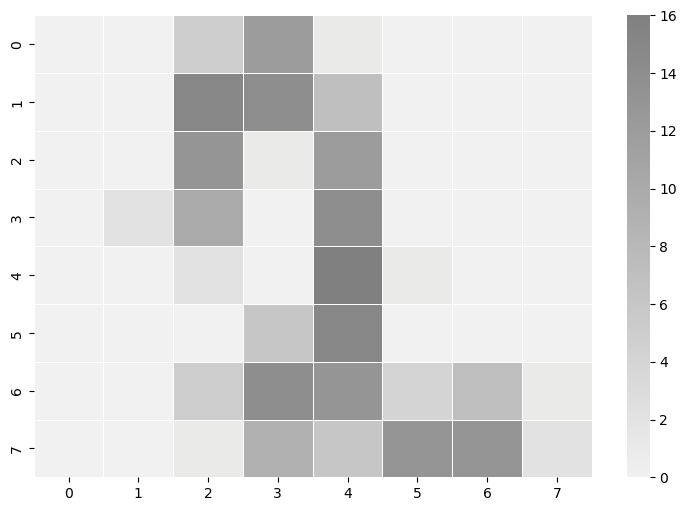

In [189]:
# This takes a given row and predicts the last 16 pixels from the first 48! And then visualizes them. 

row_to_show = 4                         # different indexing from X_all and y_all (they were reordered)
numeral = A[row_to_show,64]
all_pixels = A[row_to_show,0:64] 
first48pixels = A[row_to_show,0:48] 
lastPixKnown = 48

# X_all_scaled, y_all_scaled, X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled = preprocess_data(A, lastPixKnown, predict)
# pix_predicted, pix_actual = train_for_pixel(X_train_scaled=X_train_scaled, y_train_scaled=y_train_scaled, row=row_to_show, predict=predict)
# print(f"pix {predict} [predicted] vs. actual:  {pix_predicted} vs. {pix_actual}")
numeral = A[row_to_show,64]
print(f"The numeral is a {int(numeral)}\n")

predicted16Pixels = []
last16Pixels = A[row_to_show, 48:64]

for i in range(48,64):
    predict = i 
    X_all_scaled, y_all_scaled, X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled = preprocess_data(A, 48, i)
    pix_predicted, pix_actual = train_for_pixel(X_train_scaled=X_train_scaled, y_train_scaled=y_train_scaled, row=row_to_show, predict=i)
    print(f"pix {i} [predicted] vs. actual:  {pix_predicted} vs. {pix_actual}")
    predicted16Pixels+=[pix_predicted]

#print(predicted16Pixels)
#print(last16Pixels)

show_digit( A[row_to_show,0:64] )   # show full original
all_pixels = A[row_to_show,0:64].copy()

pix52_predicted = predict_from_model(first48pixels,pix52_final_regressor)
pix52_actual = A[row_to_show,52]

print(f"pix52 [predicted] vs. actual:  {pix52_predicted} {pix52_actual}")

# erase last 16 pixels
all_pixels[48:64] = np.zeros(16)
show_digit(all_pixels)

normal_predictions = [x[0] for x in predicted16Pixels]

all_pixels[48:64] = np.zeros(16)
for i in range(48,64):
    all_pixels[i] = normal_predictions[i -48]

show_digit(all_pixels)



The numeral is a 8

pix 48 [predicted] vs. actual:  [0.02426295] vs. 0.0
pix 49 [predicted] vs. actual:  [0.33941401] vs. 1.0
pix 50 [predicted] vs. actual:  [12.73580195] vs. 10.0
pix 51 [predicted] vs. actual:  [3.17689409] vs. 2.0
pix 52 [predicted] vs. actual:  [14.69368262] vs. 14.0
pix 53 [predicted] vs. actual:  [2.28097119] vs. 0.0
pix 54 [predicted] vs. actual:  [0.07198984] vs. 0.0
pix 55 [predicted] vs. actual:  [-0.00662789] vs. 0.0
pix 56 [predicted] vs. actual:  [0.0131178] vs. 0.0
pix 57 [predicted] vs. actual:  [0.32989496] vs. 0.0
pix 58 [predicted] vs. actual:  [10.44962216] vs. 11.0
pix 59 [predicted] vs. actual:  [15.46466773] vs. 14.0
pix 60 [predicted] vs. actual:  [13.97263434] vs. 5.0
pix 61 [predicted] vs. actual:  [2.27063762] vs. 0.0
pix 62 [predicted] vs. actual:  [0.224478] vs. 0.0
pix 63 [predicted] vs. actual:  [0.02872864] vs. 0.0
pix52 [predicted] vs. actual:  [14.59774042] 14.0


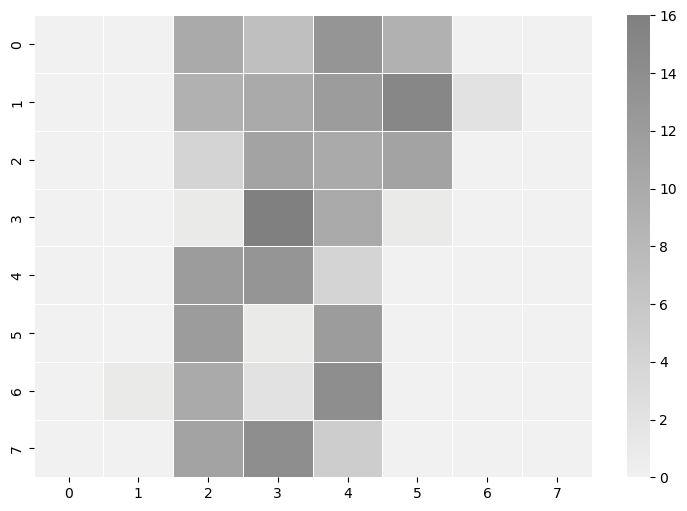

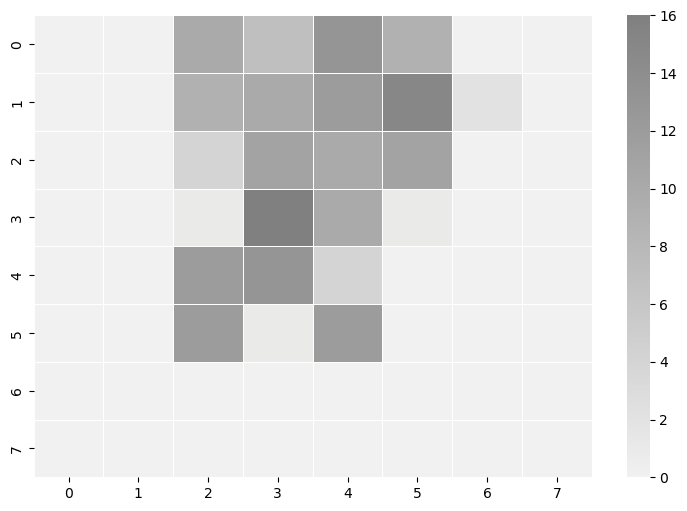

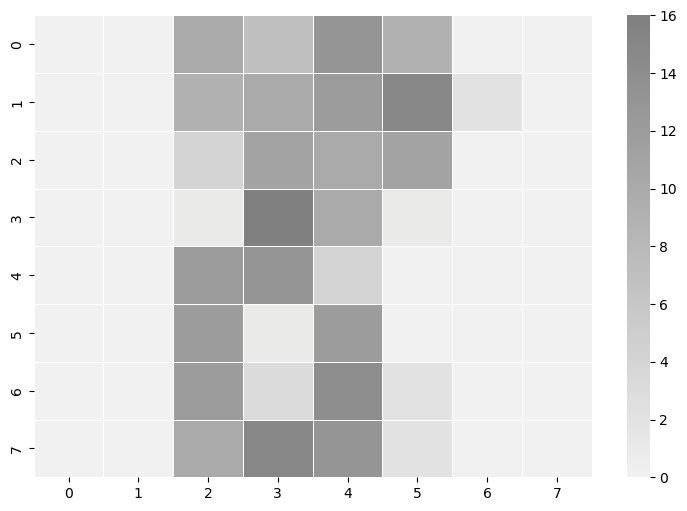

In [190]:
# This takes a given row and predicts the last 16 pixels from the first 48! And then visualizes them. 

row_to_show = 10                        # different indexing from X_all and y_all (they were reordered)
numeral = A[row_to_show,64]
all_pixels = A[row_to_show,0:64] 
first48pixels = A[row_to_show,0:48] 
lastPixKnown = 48

# X_all_scaled, y_all_scaled, X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled = preprocess_data(A, lastPixKnown, predict)
# pix_predicted, pix_actual = train_for_pixel(X_train_scaled=X_train_scaled, y_train_scaled=y_train_scaled, row=row_to_show, predict=predict)
# print(f"pix {predict} [predicted] vs. actual:  {pix_predicted} vs. {pix_actual}")
numeral = A[row_to_show,64]
print(f"The numeral is a {int(numeral)}\n")

predicted16Pixels = []
last16Pixels = A[row_to_show, 48:64]

for i in range(48,64):
    predict = i 
    X_all_scaled, y_all_scaled, X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled = preprocess_data(A, 48, i)
    pix_predicted, pix_actual = train_for_pixel(X_train_scaled=X_train_scaled, y_train_scaled=y_train_scaled, row=row_to_show, predict=i)
    print(f"pix {i} [predicted] vs. actual:  {pix_predicted} vs. {pix_actual}")
    predicted16Pixels+=[pix_predicted]

#print(predicted16Pixels)
#print(last16Pixels)

show_digit( A[row_to_show,0:64] )   # show full original
all_pixels = A[row_to_show,0:64].copy()

pix52_predicted = predict_from_model(first48pixels,pix52_final_regressor)
pix52_actual = A[row_to_show,52]

print(f"pix52 [predicted] vs. actual:  {pix52_predicted} {pix52_actual}")

# erase last 16 pixels
all_pixels[48:64] = np.zeros(16)
show_digit(all_pixels)

normal_predictions = [x[0] for x in predicted16Pixels]

all_pixels[48:64] = np.zeros(16)
for i in range(48,64):
    all_pixels[i] = normal_predictions[i -48]

show_digit(all_pixels)



The numeral is a 6

pix 48 [predicted] vs. actual:  [0.01184878] vs. 0.0
pix 49 [predicted] vs. actual:  [0.05007825] vs. 0.0
pix 50 [predicted] vs. actual:  [6.16864654] vs. 7.0
pix 51 [predicted] vs. actual:  [14.70900345] vs. 16.0
pix 52 [predicted] vs. actual:  [6.57318438] vs. 12.0
pix 53 [predicted] vs. actual:  [11.44516054] vs. 12.0
pix 54 [predicted] vs. actual:  [12.37306449] vs. 16.0
pix 55 [predicted] vs. actual:  [4.90235284] vs. 4.0
pix 56 [predicted] vs. actual:  [0.00133457] vs. 0.0
pix 57 [predicted] vs. actual:  [0.0259877] vs. 0.0
pix 58 [predicted] vs. actual:  [1.24873652] vs. 0.0
pix 59 [predicted] vs. actual:  [8.91910823] vs. 9.0
pix 60 [predicted] vs. actual:  [15.14425558] vs. 15.0
pix 61 [predicted] vs. actual:  [14.04631537] vs. 12.0
pix 62 [predicted] vs. actual:  [9.32730596] vs. 5.0
pix 63 [predicted] vs. actual:  [0.33339605] vs. 0.0
pix52 [predicted] vs. actual:  [6.3292806] 12.0


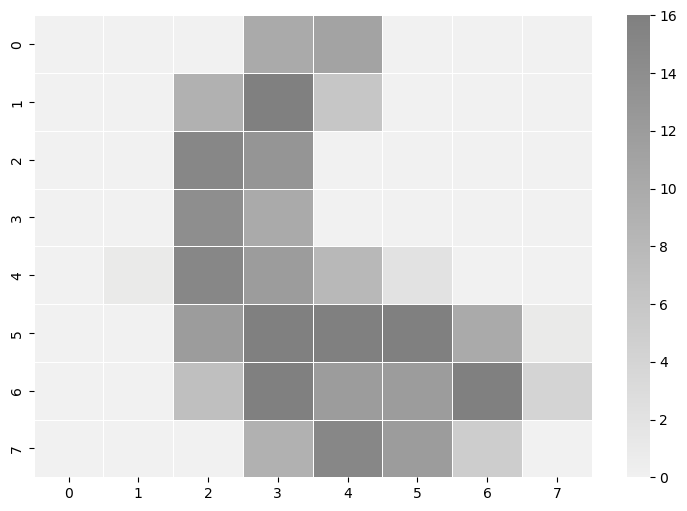

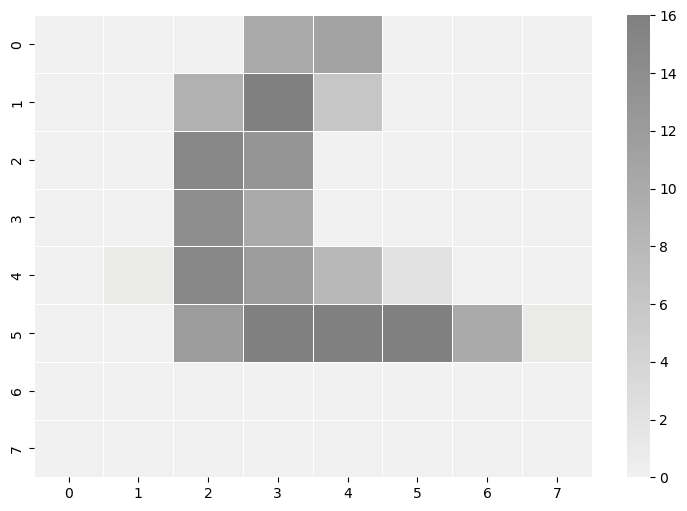

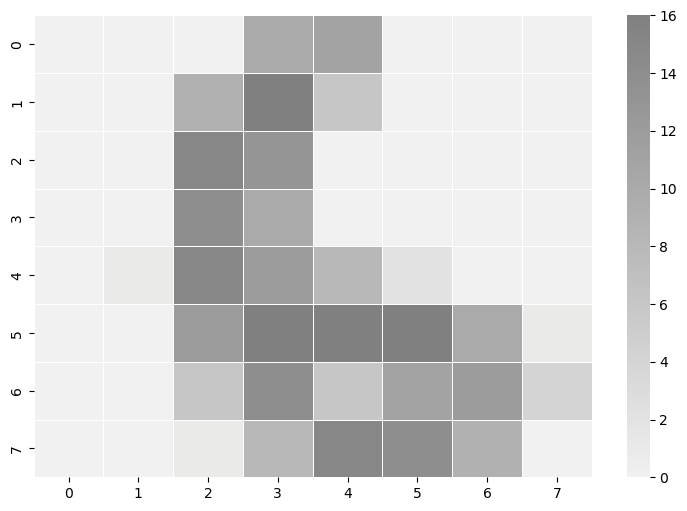

In [191]:
# This takes a given row and predicts the last 16 pixels from the first 48! And then visualizes them. 

row_to_show = 42                        # different indexing from X_all and y_all (they were reordered)
numeral = A[row_to_show,64]
all_pixels = A[row_to_show,0:64] 
first48pixels = A[row_to_show,0:48] 
lastPixKnown = 48

# X_all_scaled, y_all_scaled, X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled = preprocess_data(A, lastPixKnown, predict)
# pix_predicted, pix_actual = train_for_pixel(X_train_scaled=X_train_scaled, y_train_scaled=y_train_scaled, row=row_to_show, predict=predict)
# print(f"pix {predict} [predicted] vs. actual:  {pix_predicted} vs. {pix_actual}")
numeral = A[row_to_show,64]
print(f"The numeral is a {int(numeral)}\n")

predicted16Pixels = []
last16Pixels = A[row_to_show, 48:64]

for i in range(48,64):
    predict = i 
    X_all_scaled, y_all_scaled, X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled = preprocess_data(A, 48, i)
    pix_predicted, pix_actual = train_for_pixel(X_train_scaled=X_train_scaled, y_train_scaled=y_train_scaled, row=row_to_show, predict=i)
    print(f"pix {i} [predicted] vs. actual:  {pix_predicted} vs. {pix_actual}")
    predicted16Pixels+=[pix_predicted]

#print(predicted16Pixels)
#print(last16Pixels)

show_digit( A[row_to_show,0:64] )   # show full original
all_pixels = A[row_to_show,0:64].copy()

pix52_predicted = predict_from_model(first48pixels,pix52_final_regressor)
pix52_actual = A[row_to_show,52]

print(f"pix52 [predicted] vs. actual:  {pix52_predicted} {pix52_actual}")

# erase last 16 pixels
all_pixels[48:64] = np.zeros(16)
show_digit(all_pixels)

normal_predictions = [x[0] for x in predicted16Pixels]

all_pixels[48:64] = np.zeros(16)
for i in range(48,64):
    all_pixels[i] = normal_predictions[i -48]

show_digit(all_pixels)



## Second task:

#### Then, predict __four__ rows, instead of two
+ Then, repeat/expand this process so that your code predicts the bottom **four** rows, instead of two
+ This time, you'll train and create 32 regressors (wow!)
+ Again, choose three digits (perhaps the same ones) and show what the system dreams for their four bottom rows vs. the actual!
+ For EC, try the bottom <b>six</b> rows -- or try the actually-unknown digits in <tt>partial_digits.csv</tt> -- and, perhaps, then try to classify the full digits the system generates from those partial ones... !

In [ ]:
"""
More details:     Your task is to expand this process, so that...

[1]
  + Your system can predict the value of _any_ of the last 16 pixels from the first 48
  +     Make sure the pixels-used and pixels-predicted are easily changed,
  +     Because this problem also asks you to predict the last 32 pixels (from the first 32...)
[2]
  + Next, predict the value of _any_ of the last 32 pixels from the first 32
  +     This will be smooth if the earlier step is modular + easily changeable
[3]
  + Create "dreamed-digit" images for four digits (your choice)
  +     Use the visualization cells above and below as starting points
  +     Make sure two out of the four use 48 pixels and predict 16
  +     Make sure two out of the four use 32 pixels and predict 32
[4a]
  + Extra!  Read in the file 'partial_digits.csv'
  +     there are 10 digits with _only_ the first six rows (48 pixels)   [the last 16 are artificially set to 0]
  +     there are 10 digits with _only_ the first four rows (32 pixels)  [the last 32 are artificially set to 0]
  +     And, hallucinate the missing data! (just as above)  Visualize!
[4b]
  + Extra!  Then, _Classify_ those newly-imputed digits, using the "dreamt pixels"
  +     (Remember you created a classification network in pr2.)
  +     How does it do?
  +     Compare with how it does if you leave the zeros in the data...


Steps [1]-[3] is an example of "imputing" missing data, and then the EC uses this hallucinated (imputed) data 
so that the original digit-classifier would work.

_Any_ modeling technique can be used to impute missing data. It can be complex (NNet or RF)
or very simple, e.g., replace missing data with the average value of that feature in the dataset. 

In this spirit, check out Google's "Deep Dream" and its "Inceptionism" gallery, e.g.,
https://photos.google.com/share/AF1QipPX0SCl7OzWilt9LnuQliattX4OUCj_8EP65_cTVnBmS1jnYgsGQAieQUc1VQWdgQ?pli=1&key=aVBxWjhwSzg2RjJWLWRuVFBBZEN1d205bUdEMnhB

in which the effects (the weights) learned by the network are allowed to "spill out" into other images.
This is different than the _generated-image_ artifacts (now familiar) ...

Here, it's the weights themselves that are _intentionally_ visualized!
"""

The numeral is a 6

pix 40 [predicted] vs. actual:  [0.02143136] vs. 0.0
pix 41 [predicted] vs. actual:  [0.21142572] vs. 0.0
pix 42 [predicted] vs. actual:  [15.18297974] vs. 12.0
pix 43 [predicted] vs. actual:  [14.36543183] vs. 16.0
pix 44 [predicted] vs. actual:  [13.34762127] vs. 16.0
pix 45 [predicted] vs. actual:  [13.1272138] vs. 16.0
pix 46 [predicted] vs. actual:  [7.38588808] vs. 10.0
pix 47 [predicted] vs. actual:  [0.06308126] vs. 1.0
pix 48 [predicted] vs. actual:  [-0.02891888] vs. 0.0
pix 49 [predicted] vs. actual:  [0.46141701] vs. 0.0
pix 50 [predicted] vs. actual:  [11.11636928] vs. 7.0
pix 51 [predicted] vs. actual:  [14.74255865] vs. 16.0
pix 52 [predicted] vs. actual:  [3.98017858] vs. 12.0
pix 53 [predicted] vs. actual:  [12.98774558] vs. 12.0
pix 54 [predicted] vs. actual:  [7.58361923] vs. 16.0
pix 55 [predicted] vs. actual:  [3.95615791] vs. 4.0
pix 56 [predicted] vs. actual:  [-0.00364044] vs. 0.0
pix 57 [predicted] vs. actual:  [-0.01458118] vs. 0.0
pix 58 [

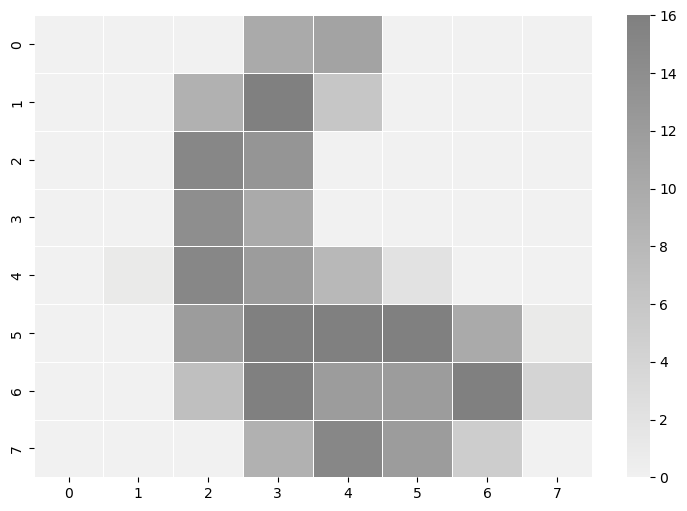

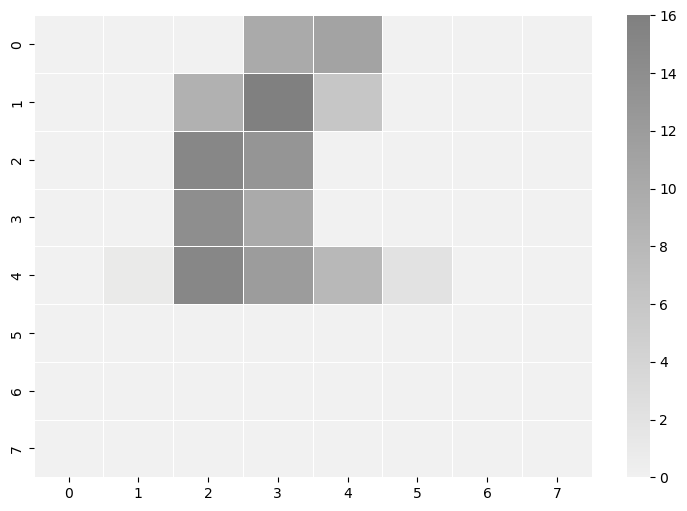

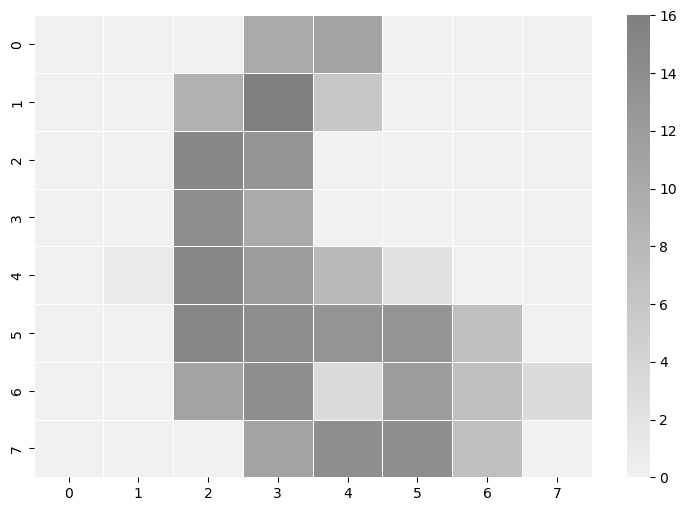

In [211]:
# This takes a given row and predicts the last 16 pixels from the first 48! And then visualizes them. 

row_to_show = 42                        # different indexing from X_all and y_all (they were reordered)
numeral = A[row_to_show,64]
all_pixels = A[row_to_show,0:64] 
first36pixels = A[row_to_show,0:36] 
lastPixKnown = 40

# X_all_scaled, y_all_scaled, X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled = preprocess_data(A, lastPixKnown, predict)
# pix_predicted, pix_actual = train_for_pixel(X_train_scaled=X_train_scaled, y_train_scaled=y_train_scaled, row=row_to_show, predict=predict)
# print(f"pix {predict} [predicted] vs. actual:  {pix_predicted} vs. {pix_actual}")
numeral = A[row_to_show,64]
print(f"The numeral is a {int(numeral)}\n")

predicted24Pixels = []
last24Pixels = A[row_to_show, lastPixKnown:64]

for i in range(lastPixKnown,64):
    predict = i 
    X_all_scaled, y_all_scaled, X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled, scaler = preprocess_data(A, lastPixKnown, i)
    pix_predicted, pix_actual = train_for_pixel(X_train_scaled=X_train_scaled, y_train_scaled=y_train_scaled, row_to_show=row_to_show, predict=i, lastPixKnown = lastPixKnown, scaler=scaler)
    print(f"pix {i} [predicted] vs. actual:  {pix_predicted} vs. {pix_actual}")
    predicted24Pixels+=[pix_predicted]

show_digit( A[row_to_show,0:64] )   # show full original
all_pixels = A[row_to_show,0:64].copy()

# erase last 24 pixels
all_pixels[lastPixKnown:64] = np.zeros(64-lastPixKnown)
show_digit(all_pixels)

normal_predictions = [x[0] for x in predicted24Pixels]

#all_pixels[lastPixKnown:64] = np.zeros(64-lastPixKnown)
for i in range(lastPixKnown,64):
    all_pixels[i] = normal_predictions[i - lastPixKnown]

show_digit(all_pixels)

The numeral is a 0

pix 40 [predicted] vs. actual:  [0.0028822] vs. 0.0
pix 41 [predicted] vs. actual:  [3.87623767] vs. 5.0
pix 42 [predicted] vs. actual:  [14.61897971] vs. 16.0
pix 43 [predicted] vs. actual:  [8.42011078] vs. 10.0
pix 44 [predicted] vs. actual:  [0.61959135] vs. 0.0
pix 45 [predicted] vs. actual:  [13.80572384] vs. 13.0
pix 46 [predicted] vs. actual:  [8.89347439] vs. 11.0
pix 47 [predicted] vs. actual:  [0.00654219] vs. 0.0
pix 48 [predicted] vs. actual:  [0.01002902] vs. 0.0
pix 49 [predicted] vs. actual:  [0.24251535] vs. 0.0
pix 50 [predicted] vs. actual:  [12.40862747] vs. 13.0
pix 51 [predicted] vs. actual:  [12.46400085] vs. 16.0
pix 52 [predicted] vs. actual:  [14.39798918] vs. 16.0
pix 53 [predicted] vs. actual:  [14.90049469] vs. 16.0
pix 54 [predicted] vs. actual:  [1.3921949] vs. 9.0
pix 55 [predicted] vs. actual:  [0.00794517] vs. 0.0
pix 56 [predicted] vs. actual:  [-0.00684568] vs. 0.0
pix 57 [predicted] vs. actual:  [0.01766972] vs. 0.0
pix 58 [predi

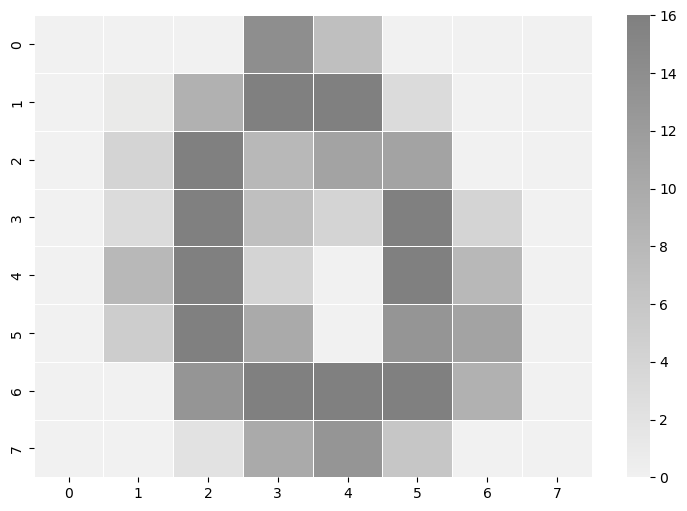

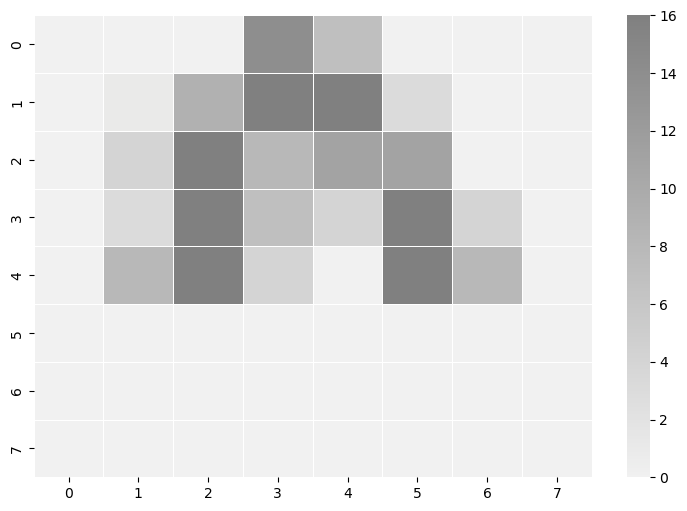

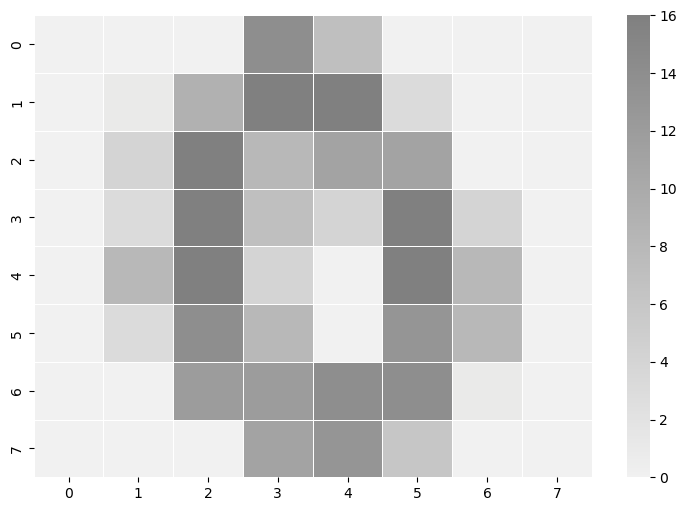

In [212]:
# This takes a given row and predicts the last 16 pixels from the first 48! And then visualizes them. 

row_to_show = 180                        # different indexing from X_all and y_all (they were reordered)
numeral = A[row_to_show,64]
all_pixels = A[row_to_show,0:64] 
first36pixels = A[row_to_show,0:36] 
lastPixKnown = 40

# X_all_scaled, y_all_scaled, X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled = preprocess_data(A, lastPixKnown, predict)
# pix_predicted, pix_actual = train_for_pixel(X_train_scaled=X_train_scaled, y_train_scaled=y_train_scaled, row=row_to_show, predict=predict)
# print(f"pix {predict} [predicted] vs. actual:  {pix_predicted} vs. {pix_actual}")
numeral = A[row_to_show,64]
print(f"The numeral is a {int(numeral)}\n")

predicted24Pixels = []
last24Pixels = A[row_to_show, lastPixKnown:64]

for i in range(lastPixKnown,64):
    predict = i 
    X_all_scaled, y_all_scaled, X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled, scaler = preprocess_data(A, lastPixKnown, i)
    pix_predicted, pix_actual = train_for_pixel(X_train_scaled=X_train_scaled, y_train_scaled=y_train_scaled, row_to_show=row_to_show, predict=i, lastPixKnown = lastPixKnown, scaler=scaler)
    print(f"pix {i} [predicted] vs. actual:  {pix_predicted} vs. {pix_actual}")
    predicted24Pixels+=[pix_predicted]

show_digit( A[row_to_show,0:64] )   # show full original
all_pixels = A[row_to_show,0:64].copy()

# erase last 24 pixels
all_pixels[lastPixKnown:64] = np.zeros(64-lastPixKnown)
show_digit(all_pixels)

normal_predictions = [x[0] for x in predicted24Pixels]

#all_pixels[lastPixKnown:64] = np.zeros(64-lastPixKnown)
for i in range(lastPixKnown,64):
    all_pixels[i] = normal_predictions[i - lastPixKnown]

show_digit(all_pixels)

The numeral is a 4

pix 40 [predicted] vs. actual:  [0.01113831] vs. 0.0
pix 41 [predicted] vs. actual:  [7.02190989] vs. 6.0
pix 42 [predicted] vs. actual:  [13.56345414] vs. 12.0
pix 43 [predicted] vs. actual:  [14.54197355] vs. 14.0
pix 44 [predicted] vs. actual:  [14.85952431] vs. 16.0
pix 45 [predicted] vs. actual:  [14.40860743] vs. 12.0
pix 46 [predicted] vs. actual:  [1.25089169] vs. 5.0
pix 47 [predicted] vs. actual:  [-0.03035123] vs. 0.0
pix 48 [predicted] vs. actual:  [0.00901678] vs. 0.0
pix 49 [predicted] vs. actual:  [0.74309865] vs. 0.0
pix 50 [predicted] vs. actual:  [2.39731467] vs. 0.0
pix 51 [predicted] vs. actual:  [7.60670317] vs. 8.0
pix 52 [predicted] vs. actual:  [14.79731981] vs. 13.0
pix 53 [predicted] vs. actual:  [5.09816483] vs. 0.0
pix 54 [predicted] vs. actual:  [0.20407666] vs. 0.0
pix 55 [predicted] vs. actual:  [-0.01306073] vs. 0.0
pix 56 [predicted] vs. actual:  [0.00010012] vs. 0.0
pix 57 [predicted] vs. actual:  [-0.09956448] vs. 0.0
pix 58 [predi

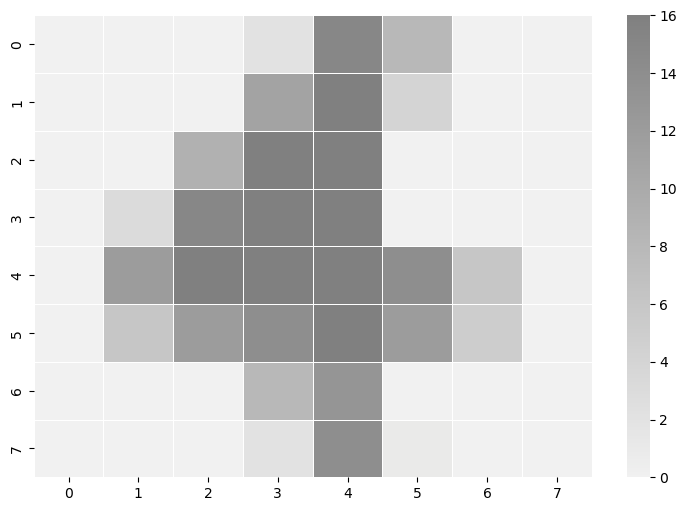

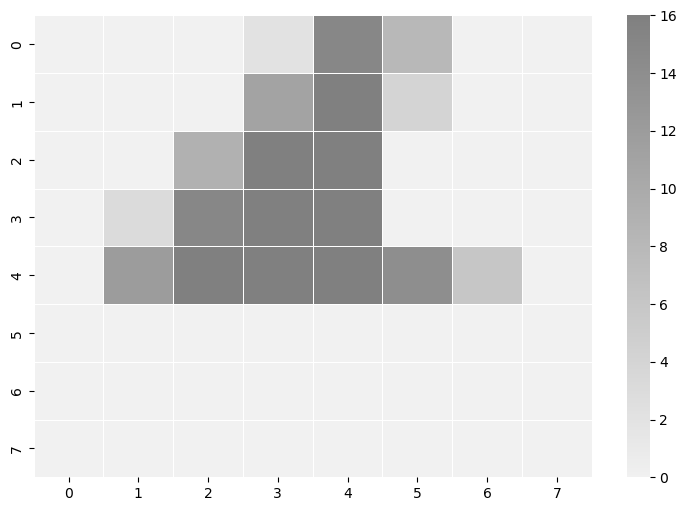

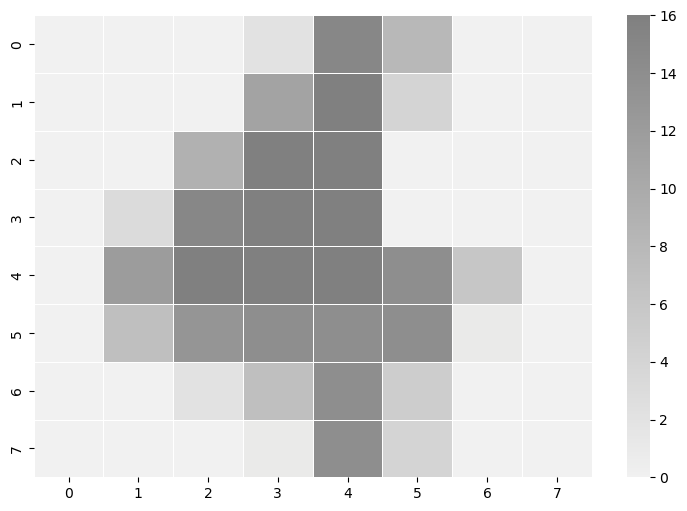

In [213]:
# This takes a given row and predicts the last 16 pixels from the first 48! And then visualizes them. 

row_to_show = 199                        # different indexing from X_all and y_all (they were reordered)
numeral = A[row_to_show,64]
all_pixels = A[row_to_show,0:64] 
first36pixels = A[row_to_show,0:36] 
lastPixKnown = 40

# X_all_scaled, y_all_scaled, X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled = preprocess_data(A, lastPixKnown, predict)
# pix_predicted, pix_actual = train_for_pixel(X_train_scaled=X_train_scaled, y_train_scaled=y_train_scaled, row=row_to_show, predict=predict)
# print(f"pix {predict} [predicted] vs. actual:  {pix_predicted} vs. {pix_actual}")
numeral = A[row_to_show,64]
print(f"The numeral is a {int(numeral)}\n")

predicted24Pixels = []
last24Pixels = A[row_to_show, lastPixKnown:64]

for i in range(lastPixKnown,64):
    predict = i 
    X_all_scaled, y_all_scaled, X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled, scaler = preprocess_data(A, lastPixKnown, i)
    pix_predicted, pix_actual = train_for_pixel(X_train_scaled=X_train_scaled, y_train_scaled=y_train_scaled, row_to_show=row_to_show, predict=i, lastPixKnown = lastPixKnown, scaler=scaler)
    print(f"pix {i} [predicted] vs. actual:  {pix_predicted} vs. {pix_actual}")
    predicted24Pixels+=[pix_predicted]

show_digit( A[row_to_show,0:64] )   # show full original
all_pixels = A[row_to_show,0:64].copy()

# erase last 24 pixels
all_pixels[lastPixKnown:64] = np.zeros(64-lastPixKnown)
show_digit(all_pixels)

normal_predictions = [x[0] for x in predicted24Pixels]

#all_pixels[lastPixKnown:64] = np.zeros(64-lastPixKnown)
for i in range(lastPixKnown,64):
    all_pixels[i] = normal_predictions[i - lastPixKnown]

show_digit(all_pixels)